Chapter 24

# 拟合，无截距
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码主要用于通过最小二乘法来拟合数据并可视化拟合的结果。在这里，我们有两种动物的数量数据：鸡和兔子，数据存储在数组`num_chickens`和`num_rabbits`中。通过建立一个线性模型，目标是找到一个最佳的斜率$a$，使得模型的预测值能够尽可能接近实际观察到的兔子数量。

首先，我们定义了一个预测函数$y_{\text{pred}}$，表示兔子的数量与鸡的数量之间的线性关系，即：

$$y_{\text{pred}} = a \cdot x_{\text{chickens}}$$

接下来，通过计算每个鸡数量对应的兔子数量的误差平方和（Sum of Squared Errors，SSE），并用符号计算得到$SSE$的表达式：

$$SSE(a) = \sum_{i=1}^{n} (y_{\text{rabbits}}[i] - a \cdot x_{\text{chickens}}[i])^2$$

代码中使用SymPy库来进行符号计算，以便在不同的$a$值下计算$SSE$的值，找到使得$SSE$最小的$a$值。

在计算出最佳的$a$后，我们绘制了鸡的数量与兔子的数量之间的关系图。在图中，使用红色线条表示预测的兔子数量，同时标记出实际的散点数据。为每个散点数据绘制矩形，以显示它们与预测值之间的差异。这种表示方式有助于我们更直观地理解模型的拟合效果和残差的大小。

最后，输出最优解和对应的误差，进一步验证模型的准确性和可靠性。整个过程可以清楚地反映出如何利用线性回归分析来进行数据建模及预测。

In [1]:
from sympy.abc import a  # 导入符号变量 a
import numpy as np  # 导入 NumPy 库
import matplotlib.pyplot as plt  # 导入 Matplotlib 库用于绘图

## 定义绘图装饰函数

In [2]:
def fig_decor(ax):  # 定义绘图装饰函数
    plt.xlabel('$x$ (number of chickens)')  # 设置 x 轴标签
    plt.ylabel('$y$ (number of rabbits)')  # 设置 y 轴标签
    plt.axis('scaled')  # 使 x 和 y 轴比例相同
    ax.set_xlim([0, 120])  # 设置 x 轴范围
    ax.set_ylim([0, 80])  # 设置 y 轴范围
    plt.xticks(np.arange(0, 120 + 1, step=10))  # 设置 x 轴刻度
    plt.yticks(np.arange(0, 80 + 1, step=10))  # 设置 y 轴刻度
    plt.minorticks_on()  # 打开次刻度
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color=[0.8, 0.8, 0.8])  # 设置次刻度网格
    ax.spines['top'].set_visible(False)  # 隐藏上边框
    ax.spines['right'].set_visible(False)  # 隐藏右边框
    ax.spines['bottom'].set_visible(False)  # 隐藏下边框
    ax.spines['left'].set_visible(False)  # 隐藏左边框
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 设置主网格

## 生成数据

In [3]:
num_chickens = np.array([32, 110, 71, 79, 45, 20, 56, 55, 87, 68, 87, 63, 31, 88])  # 鸡的数量
num_rabbits  = np.array([22, 53, 39, 40, 25, 15, 34, 34, 52 , 41, 43, 33, 24, 52])  # 兔子的数量

## 散点图

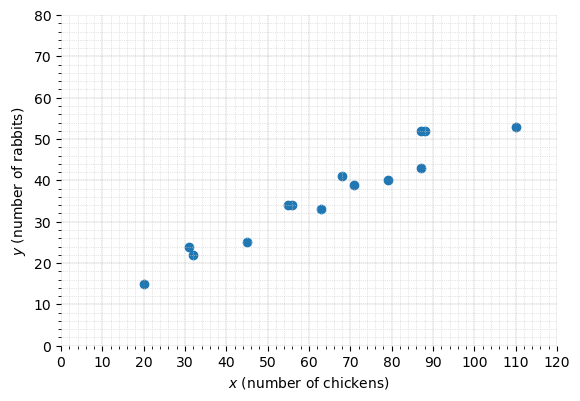

In [4]:
fig, ax = plt.subplots()  # 创建子图
plt.scatter(num_chickens, num_rabbits)  # 绘制散点图
fig_decor(ax)  # 应用图形装饰

In [5]:
# 生成 f(a)，最小二乘误差（SSE），符号表示
from sympy import *  # 导入符号计算库

y_pred = a*num_chickens  # 预测值

In [6]:
f_a_SSE = np.sum((num_rabbits - y_pred)**2)  # 计算误差平方和
f_a_SSE = simplify(f_a_SSE)  # 简化表达式
print(f_a_SSE)  # 输出 SSE 表达式

65428*a**2 - 72228*a + 20179


In [7]:
# 绘制 f(a) 与 a 的关系
a_array = np.linspace(0,1,51)  # 创建 a 的值范围

In [8]:
f_a_SSE_fcn = lambdify(a, f_a_SSE)  # 将 SSE 函数转化为可计算的函数
SSE_array = f_a_SSE_fcn(a_array)  # 计算不同 a 值下的 SSE

In [9]:
# 一阶导数
df_da_SSE = diff(f_a_SSE, a)  # 计算一阶导数
print(df_da_SSE)  # 输出一阶导数

130856*a - 72228


In [10]:
# 解 a 的值
a_star_only = solve(df_da_SSE, a)  # 求解使一阶导数为零的 a 值
print(a_star_only)  # 输出解

[18057/32714]


In [11]:
a_star_only = a_star_only[0].evalf()  # 计算 a 的数值解

In [12]:
SSE_min = f_a_SSE_fcn(a_star_only)  # 计算最小 SSE 值

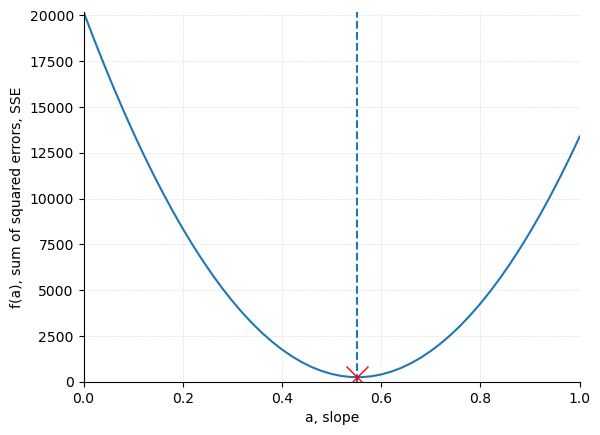

In [13]:
fig, ax = plt.subplots()  # 创建子图
plt.plot(a_array, SSE_array)  # 绘制 SSE 随 a 的变化
plt.axvline(x=a_star_only, linestyle='--')  # 绘制 a 的最优解线
plt.plot(a_star_only, SSE_min, 'rx', markersize=16)  # 绘制最优解点

plt.xlabel('a, slope')  # 设置 x 轴标签
plt.ylabel('f(a), sum of squared errors, SSE')  # 设置 y 轴标签
ax.set_xlim([a_array.min(), a_array.max()])  # 设置 x 轴范围
ax.set_ylim([0, SSE_array.max()])  # 设置 y 轴范围

ax.grid(linestyle=':', linewidth='0.5', color=[0.8, 0.8, 0.8])  # 设置网格

ax.spines['top'].set_visible(False)  # 隐藏上边框
ax.spines['right'].set_visible(False)  # 隐藏右边框

## y = ax 模型

In [14]:
def plot_square(x,y1,y2):  # 定义绘制矩形的函数
    if y2 > y1:  # 确保 y2 是较小的值
        temp = y2
        y2 = y1
        y1 = temp

    d = y1 - y2  # 计算高差

    plt.fill(np.vstack((x, x + d, x + d, x)), 
             np.vstack((y2, y2, y1, y1)),
             facecolor='b', edgecolor='none',
             alpha=0.3)  # 绘制矩形

In [15]:
x_array = np.linspace(0,150,10)[:, None]  # 创建 x 的值范围

In [16]:
y_pred = a_star_only*x_array  # 计算预测值

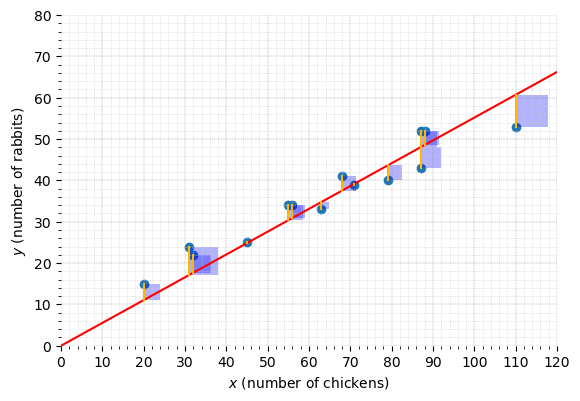

In [17]:
fig, ax = plt.subplots()  # 创建子图

plt.plot(x_array, y_pred, color='r')  # 绘制预测的线
plt.scatter(num_chickens, num_rabbits)  # 绘制散点图

num_rabbits_predicted = a_star_only*num_chickens  # 计算预测的兔子数量

plt.plot(np.vstack((num_chickens,num_chickens)),
         np.vstack((num_rabbits, num_rabbits_predicted)),
         color=np.array([255,182,0])/255)  # 绘制预测线

for i in range(0,len(num_rabbits_predicted)):  # 绘制每个点的矩形
    plot_square(num_chickens[i],num_rabbits[i],num_rabbits_predicted[i]); 

fig_decor(ax)  # 应用图形装饰